In [11]:
import pandas as pd
fake_news=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Fake_News.xlsx')

In [12]:
real_news=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Real_News.xlsx')

In [14]:
fake_news['Label']= 0

In [15]:
real_news['Label']=1

In [16]:
data=pd.concat([real_news, fake_news])

In [17]:
print(real_news.shape)
print(fake_news.shape)
print(data.shape)

(21755, 4)
(23697, 4)
(45452, 4)


In [25]:
fake_news['NewsText'][0]

'Senate Minority Leader Harry Reid has it out for Republican nominee Donald Trump.On Thursday on the Senate floor, Senator Reid (D-Nev.) unleashed a rant against the business mogul with a bitterness that makes you wonder just how long he had been holding it in. Reid is approaching retirement as January draws near, and it s clear that the Democratic leader wants America to understand just how important it is to make sure that the country isn t left in Trump s little, orange, greedy hands.Making reference to a Newsweek article that questions the Trump Organization s international business ties and suggests that a President Trump could be disastrous for national security, Reid called Trump  a spoiled brat  and  a notorious con artist  whose questionable, scammy business practices would only spill over into his administration if he becomes President. Reid said: Let s be clear about Donald Trump. He s a spoiled brat, raised in plenty, who inherited a fortune, used his money to make more mon

In [ ]:
data.head()

,Title,News_text,Subject,Label
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,1


In [ ]:
data.describe(include='all')

,Title,News_text,Subject,Label
count,45452,45452,45452,45452.000000
unique,39172,39085,9,NaN
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,NaN
freq,14,628,11363,NaN
mean,NaN,NaN,NaN,0.478637
std,NaN,NaN,NaN,0.499549
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,1.000000


In [ ]:
data.nunique()

Title        39172
News_text    39085
Subject          9
Label            2
dtype: int64

In [ ]:
print(data.shape)
data=data.drop_duplicates(subset=['NewsText'])
print(data.shape)

(45452, 4)
(39085, 4)


In [ ]:
data.isna().sum()

Title        0
News_text    0
Subject      0
Label        0
dtype: int64

In [ ]:
message=data.copy()

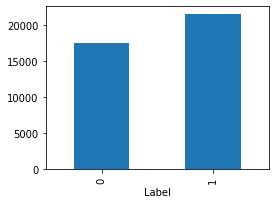

In [ ]:
%matplotlib inline
GroupedData=message.groupby('Label').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [ ]:
message['ID']=range(0,len(message))

In [ ]:
SelectedColumns=['Title', 'NewsText', 'Subject']

# Selecting final columns
DataForML=message[SelectedColumns]
DataForML.head()

,Title,News_text,Subject
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews


In [ ]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory

Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_unfilter_data.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(DataForML, file)
    file.close()

In [ ]:
import pickle
# Load the Model back from file
# Pkl_Filename='/content/Pickle_RL_Model.pkl'
# Drive location
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_unfilter_data.pkl"

with open(Pkl_Filename, 'rb') as file:  
    Pickled_unfilter_data = pickle.load(file)
    file.close()
Pickled_unfilter_data

,Title,News_text,Subject
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews
...,...,...,...
23687,WATCH: Rachel Maddow Has PERFECT Argument To ...,"Donald Trump can brag all he wants, but Rachel...",News
23689,IRONIC: WHITE SOUTHERNER BILL CLINTON Just Tol...,OOPS! IN 2008 BILL CLINTON SAID THE SAME THING...,politics
23691,WATCH: Tony Awards Gives Hateful Bigots The M...,Overwhelmed by the sadness of the mass shootin...,News
23693,Bill Maher Gets His Swagger On Over Liberal C...,Bill Maher finished Friday s episode of Real T...,News


## Wordcloud on real data Label=1

In [ ]:
news=message[message['Label']==1]['NewsText'].values
news_string=str(news)
print(news_string)

['WASHINGTON (Reuters) - A lawyer nominated by President Donald Trump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went viral last week. Trump accepted Matthew Petersenâ€™s offer to withdraw his nomination as a district court judge in Washington, a White House official said. Petersen, a Republican member of the Federal Election Commission, became the latest of Trumpâ€™s judicial nominations to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. â€œJust because youâ€™ve seen â€˜My Cousin Vinnyâ€™ doesnâ€™t qualify you to be a federal judge,â€\x9d Republican Senator John Kennedy, who grilled Petersen during his Dec. 13 confirmation hearing, told WWL-TV, referring to the 1992 comedy film about a novice lawyer. Kennedy, who has been critical of some of Trumpâ€™s judicial nominees, asked several 

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('brown')

In [ ]:
import re
from nltk.corpus import stopwords

news_string2=re.sub(r"\([^()]*\)",r" ",news_string)
news_string2=re.sub(r'[^a-z A-Z]',r' ',news_string2)
news_string2=news_string2.lower()
news_string2=re.sub(r'\b\w{1,3}\b',r' ',news_string2)
news_string2=re.sub(r' +', r' ',news_string2)
news_string2 = [word for word in news_string2.split(" ") if not word in stopwords.words('english')]
worcloud_string=" ".join(news_string2)
print(worcloud_string)

 washington lawyer nominated president donald trump serve federal judge withdrew consideration monday video senate confirmation hearing showing unable provide answers rudimentary legal questions went viral last week trump accepted matthew petersen offer withdraw nomination district court judge washington white house official said petersen republican member federal election commission became latest trump judicial nominations fail president seeks confirmation judges make federal judiciary conservative seen cousin vinny qualify federal judge republican senator john kennedy grilled petersen confirmation hearing told referring comedy film novice lawyer kennedy critical trump judicial nominees asked several basic legal questions petersen could answer video shown cable news shows widely viewed internet honored nominated position become clear past days nomination become distraction fair administration petersen wrote withdrawal letter trump hoped nearly decades public service might carry weight

In [ ]:
# Finding out the frequency of words in text
import pandas as pd

# Creating a Dataframe
news_string3=[]
custom_stopwords=['said','hariri','would']
for value in news_string2:
    if not value in custom_stopwords:
    news_string3.append(value)

WordData=pd.DataFrame(data= pd.Series(news_string3), columns=['words'])   
# Finding the top frequency words
WordData.groupby('words').size().nlargest(10)

words
rule         12
trump        12
trade        10
lebanon       9
petersen      7
president     7
wednesday     7
federal       6
noreika       6
thursday      6
dtype: int64

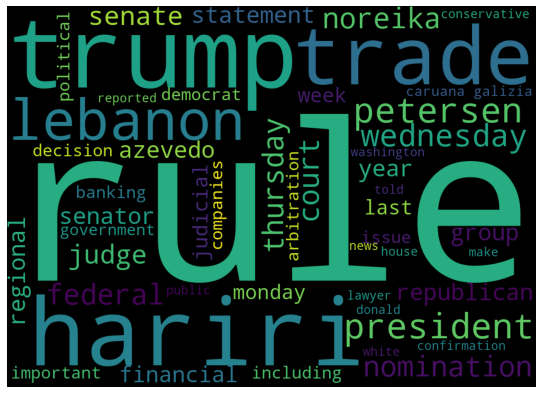

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['said','would']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(worcloud_string)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## Wordcloud on fake data Label=0

In [ ]:
news_fake=message[message['Label']==0]['NewsText'].values
news_string_fake=str(news_fake)
print(news_string_fake)

['Senate Minority Leader Harry Reid has it out for Republican nominee Donald Trump.On Thursday on the Senate floor, Senator Reid (D-Nev.) unleashed a rant against the business mogul with a bitterness that makes you wonder just how long he had been holding it in. Reid is approaching retirement as January draws near, and it s clear that the Democratic leader wants America to understand just how important it is to make sure that the country isn t left in Trump s little, orange, greedy hands.Making reference to a Newsweek article that questions the Trump Organization s international business ties and suggests that a President Trump could be disastrous for national security, Reid called Trump  a spoiled brat  and  a notorious con artist  whose questionable, scammy business practices would only spill over into his administration if he becomes President. Reid said: Let s be clear about Donald Trump. He s a spoiled brat, raised in plenty, who inherited a fortune, used his money to make more mo

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('brown')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords

news_string_fake2=re.sub(r"\([^()]*\)",r" ",news_string_fake)
news_string_fake2=re.sub(r'[^a-z A-Z]',r' ',news_string_fake2)
news_string_fake2=news_string_fake2.lower()
news_string_fake2=re.sub(r'\b\w{1,3}\b',r' ',news_string_fake2)
news_string_fake2=re.sub(r' +', r' ',news_string_fake2)
news_string_fake2 = [word for word in news_string_fake2.split(" ") if not word in stopwords.words('english')]
worcloud_string_fake=" ".join(news_string_fake2)
print(worcloud_string_fake)

 senate minority leader harry reid republican nominee donald trump thursday senate floor senator reid unleashed rant business mogul bitterness makes wonder long holding reid approaching retirement january draws near clear democratic leader wants america understand important make sure country left trump little orange greedy hands making reference newsweek article questions trump organization international business ties suggests president trump could disastrous national security reid called trump spoiled brat notorious artist whose questionable scammy business practices would spill administration becomes president reid said clear donald trump spoiled brat raised plenty inherited fortune used money make money swindling working women would change president answer simple trump change asking rich scamming america donald trump trying help person donald trump given opportunity donald trump turn america scam like trump university reid also raised eyebrows calling trump human leech trump human l

In [ ]:
# Finding out the frequency of words in text
import pandas as pd

# Creating a Dataframe
news_string_fake3=[]
custom_stopwords=['said','hariri','would']
for value in news_string_fake2:
    if not value in custom_stopwords:
    news_string_fake3.append(value)

WordData_fake=pd.DataFrame(data= pd.Series(news_string_fake3), columns=['words'])   
# Finding the top frequency words
WordData_fake.groupby('words').size().nlargest(10)

words
trump         38
republican    13
donald        12
percent       11
reid          11
every         10
also           9
bradford       9
like           8
president      8
dtype: int64

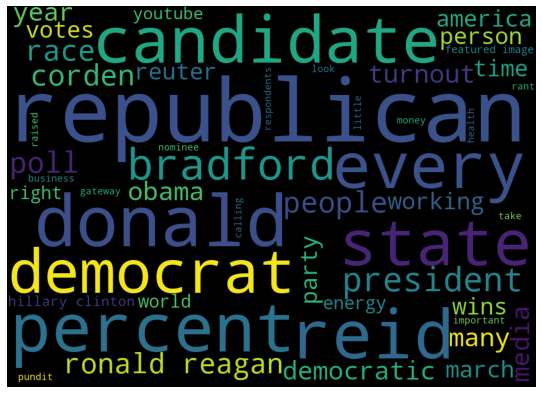

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['trump','said','would']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(worcloud_string_fake)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## TextBlob on real data label=1

##### Important word combinations ####
[_'washington reuters donald_trump federal_judge_withdrew senate_confirmation_hearing legal_questions trump matthew_petersenâ€™s district_court_judge washington white_house petersen republican federal_election_commission trumpâ€™s judicial_nominations federal_judiciary cousin_vinnyâ€™ federal_judge republican john_kennedy petersen dec. confirmation_hearing wwl-tv comedy_film novice_lawyer kennedy trumpâ€™s judicial_nominees basic_legal_questions petersen cable_news_shows petersen withdrawal_letter trump public_service petersen petersen trump past_week republican chuck_grassley judiciary trumpâ€™s jeff_mateer brett_talley controversial_statements talley online_magazine_slate sympathetic_comments early_history ku_klux_klan white_supremacist_group white_house_counselâ€™s_office overseas_judicial_nominations mateer transgender_children â€œsatanâ€™s_plans cnn trump significant_progress federal_courts conservative_judges important_courts neil_gorsuch co

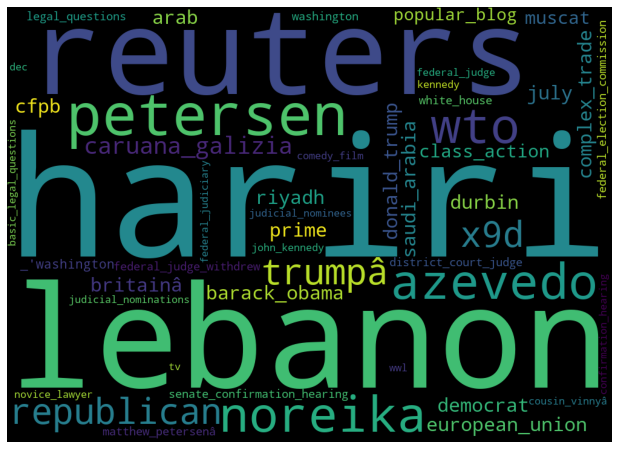

In [ ]:
# Textblob library installation
# !pip install textblob

# installing the wordcloud library
# !pip install wordcloud

########################################################################
# Finding the important word combinations using textblob
from textblob import TextBlob

# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(news_string)

# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases

# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString)

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['trump']

########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS


wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            background_color='black',
                           stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## TextBlob on fake data label=0

##### Important word combinations ####
[_'senate minority harry_reid republican donald_trump.on senate_floor reid d-nev. business_mogul reid january democratic_leader america country_isn_t trump newsweek trump organization_s international_business_ties trump national_security reid trump notorious_con_artist scammy_business_practices reid donald_trump trump america donald_trump donald_trump donald_trump america big_scam trump reid trump human_leech trump human_leech golf_resort reid amazing_anti-trump_rant reid s_rant pretty_epic trump trump reid trump democratic_nominee hillary_clinton s_health trump drawing_attention own_unhealthy_lifestyle reid harry_reid featured alex_wong getty_images' hillary_clinton finish_line mainstream_media rino important_factoid massive_turnout trump ronald_reagan donald_j._trump general_election media_plays reuters presidential_race democratic_side champaign_corks.the_poll_shows_presumptive democratic_nominee hillary_clinton republican donald_trump skewed.t

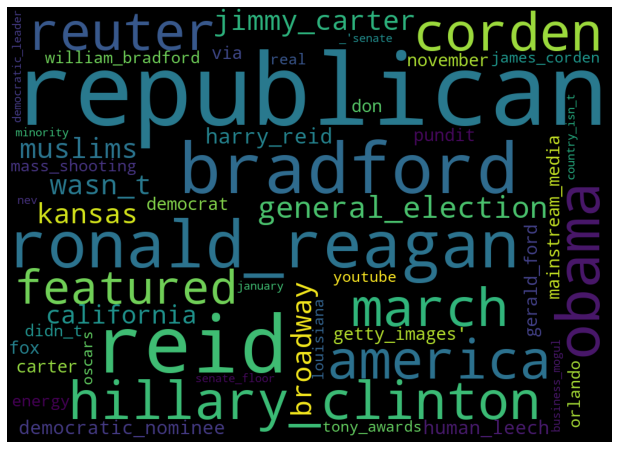

In [ ]:
# Textblob library installation
# !pip install textblob

# installing the wordcloud library
# !pip install wordcloud

########################################################################
# Finding the important word combinations using textblob
from textblob import TextBlob

# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(news_string_fake)

# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases

# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString)

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['trump','donald_trump']

########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS


wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            background_color='black',
                           stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## NLTK word filter

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.corpus import stopwords 
# from nltk.stem.porter import PorterStemmer
import re
# ps=PorterStemmer()
newsText=[]
heavyfile=[]

for i in range(0,len(message)):
  review = re.sub(r'[^a-z A-Z]',r'',message['NewsText'][i])
  review = review.lower()
  review = review.split()

  # review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = [word for word in review if not word in stopwords.words('english')]
  heavyfile.append(review)
  review = ' '.join(review)
  newsText.append(review)

In [ ]:
from nltk.corpus import stopwords 
# from nltk.stem.porter import PorterStemmer
import re
# ps=PorterStemmer()
titletext=[]
heavyfiletitle=[]
for i in range(0,len(message)):
  review = re.sub(r'[^a-z A-Z]',r'',message['Title'][i])
  review = review.lower()
  review = review.split()

  # review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = [word for word in review if not word in stopwords.words('english')]
  heavyfiletitle.append(review)
  review = ' '.join(review)
  titletext.append(review)

In [ ]:
dataframe=pd.DataFrame(data=titletext,index=message.index,columns=['Title'])
dataframe

,Title
0,trump judicial nominee withdraws consideration
1,democrat senate calls franken resign
2,wto chief wont debate trump rallies support trade
3,hungary says facing frontal assault us financi...
4,senate republicans shove tax bill ahead democr...
...,...
23687,watch rachel maddow perfect argument prove tru...
23689,ironic white southerner bill clinton told blac...
23691,watch tony awards gives hateful bigots middle ...
23693,bill maher gets swagger liberal california cru...


In [ ]:
dataframe['ID']=range(0,len(dataframe))

In [ ]:
dataframe

,Title,ID
0,trump judicial nominee withdraws consideration,0
1,democrat senate calls franken resign,1
2,wto chief wont debate trump rallies support trade,2
3,hungary says facing frontal assault us financi...,3
4,senate republicans shove tax bill ahead democr...,4
...,...,...
23687,watch rachel maddow perfect argument prove tru...,39080
23689,ironic white southerner bill clinton told blac...,39081
23691,watch tony awards gives hateful bigots middle ...,39082
23693,bill maher gets swagger liberal california cru...,39083


In [ ]:
from pandas import DataFrame

newsText = DataFrame(newsText,columns=['NewsText'])
print (newsText)

# newsText

                                                NewsText
0      washington reuters lawyer nominated president ...
1      reuters us senator dick durbin democrat senate...
2      geneva reuters head world trade organization s...
3      budapest reuters hungary facing frontal assaul...
4      washington reuters us senate republicans ramme...
...                                                  ...
39080  donald trump brag wants rachel maddow knows tr...
39081    oops bill clinton said thing make america great
39082  overwhelmed sadness mass shooting orlando flor...
39083  bill maher finished friday episode real time a...
39084  state department released clinton emails today...

[39085 rows x 1 columns]


In [ ]:
newsText['ID']=range(0,len(newsText))

In [ ]:
newsText

,NewsText,ID
0,washington reuters lawyer nominated president ...,0
1,reuters us senator dick durbin democrat senate...,1
2,geneva reuters head world trade organization s...,2
3,budapest reuters hungary facing frontal assaul...,3
4,washington reuters us senate republicans ramme...,4
...,...,...
39080,donald trump brag wants rachel maddow knows tr...,39080
39081,oops bill clinton said thing make america great,39081
39082,overwhelmed sadness mass shooting orlando flor...,39082
39083,bill maher finished friday episode real time a...,39083


In [ ]:
mergedata=pd.merge(dataframe, newsText,on='ID')

In [ ]:
mergedata=mergedata.merge(message['Subject'],on=message['ID'])

In [ ]:
mergedata=mergedata.drop(['key_0'],axis=1)

In [ ]:
mergedata=mergedata.merge(message['Label'],on=message['ID'])

In [ ]:
mergedata=mergedata.drop(['key_0'],axis=1)

In [ ]:
mergedata

,Title,NewsText,Subject,Label
0,trump judicial nominee withdraws consideration,washington reuters lawyer nominated president ...,politicsNews,1
1,democrat senate calls franken resign,reuters us senator dick durbin democrat senate...,politicsNews,1
2,wto chief wont debate trump rallies support trade,geneva reuters head world trade organization s...,politicsNews,1
3,hungary says facing frontal assault us financi...,budapest reuters hungary facing frontal assaul...,worldnews,1
4,senate republicans shove tax bill ahead democr...,washington reuters us senate republicans ramme...,politicsNews,1
...,...,...,...,...
39080,watch rachel maddow perfect argument prove tru...,donald trump brag wants rachel maddow knows tr...,News,0
39081,ironic white southerner bill clinton told blac...,oops bill clinton said thing make america great,politics,0
39082,watch tony awards gives hateful bigots middle ...,overwhelmed sadness mass shooting orlando flor...,News,0
39083,bill maher gets swagger liberal california cru...,bill maher finished friday episode real time a...,News,0


In [ ]:
mergedata.groupby('Label').size()

Label
0    17565
1    21520
dtype: int64

In [ ]:
mergedata=mergedata.drop('ID',axis=1)

## Filtered MergedData

In [ ]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory

Pkl_Filename = "/content/Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(mergedata, file)
    file.close()

NameError: ignored

In [ ]:
import pickle
# Load the Model back from file
# Pkl_Filename='/content/Pickle_RL_Model.pkl'
# Drive location
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_RL_Model.pkl"

with open(Pkl_Filename, 'rb') as file:  
    Pickled_data = pickle.load(file)
    file.close()

Pickled_data

,Title,NewsText,Subject,Label
0,trump judicial nominee withdraws consideration,washington reuters lawyer nominated president ...,politicsNews,1
1,democrat senate calls franken resign,reuters us senator dick durbin democrat senate...,politicsNews,1
2,wto chief wont debate trump rallies support trade,geneva reuters head world trade organization s...,politicsNews,1
3,hungary says facing frontal assault us financi...,budapest reuters hungary facing frontal assaul...,worldnews,1
4,senate republicans shove tax bill ahead democr...,washington reuters us senate republicans ramme...,politicsNews,1
...,...,...,...,...
39080,watch rachel maddow perfect argument prove tru...,donald trump brag wants rachel maddow knows tr...,News,0
39081,ironic white southerner bill clinton told blac...,oops bill clinton said thing make america great,politics,0
39082,watch tony awards gives hateful bigots middle ...,overwhelmed sadness mass shooting orlando flor...,News,0
39083,bill maher gets swagger liberal california cru...,bill maher finished friday episode real time a...,News,0


In [ ]:
X = Pickled_data.iloc[:,:-1].values
y = Pickled_data.iloc[:,-1].values

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
mat_text = cv.fit_transform(X[:,1]).todense()

In [ ]:
mat_text

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
mat_title = cv.fit_transform(X[:,0]).todense()

In [ ]:
mat_title

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
mat_subject = cv.fit_transform(X[:,2]).todense()

In [ ]:
mat_subject

matrix([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import numpy as np
X_mat=np.hstack((mat_title,mat_text,mat_subject))

In [ ]:
X_mat.shape

(39085, 10010)

## Pickle package for MATRIX data

In [ ]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory
Pkl_Filename = '/content/Pickle_CountVec.pkl'
# Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_CountVec.pkl" 

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(X_mat, file)
    file.close()

In [3]:
import pickle
# Load the Model back from file
# Pkl_Filename = '/content/Pickle_CountVec.pkl'
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_CountVec.pkl" 

with open(Pkl_Filename, 'rb') as file:  
    CountVec_data = pickle.load(file)
    file.close()
CountVec_data

matrix([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Picke package for y data

import pickle

# Save the Modle to file in the current working directory
# Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_CountVec_y.pkl"
Pkl_Filename = "/content/Pickle_CountVec_y.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(y, file)
    file.close()

In [4]:
import pickle
# Load the Model back from file
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_CountVec_y.pkl"
# Pkl_Filename='/content/Pickle_CountVec_y.pkl'

with open(Pkl_Filename, 'rb') as file:  
    CountVec_y_data = pickle.load(file)
    file.close()

CountVec_y_data

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
CountVec_data.shape,CountVec_y_data.shape

((39085, 10010), (39085,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(CountVec_data,CountVec_y_data,test_size=0.3,random_state=0)

## Model Creation

notebook in google colab restarting.

In [ ]:
# notebook in google colab restarting.
# Logistic regression
# from sklearn.linear_model import LogisticRegression
# lrc =  LogisticRegression(solver='newton-cg')
# print(lrc)
# lrc.fit(X_train,y_train)
# y_pred=lrc.predict(X_test)

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(f1_score(y_test,y_pred,average='weighted'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10,n_estimators=200,criterion='gini')
print(rfc)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[5205   79]
 [  61 6381]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5284
           1       0.99      0.99      0.99      6442

    accuracy                           0.99     11726
   macro avg       0.99      0.99      0.99     11726
weighted avg       0.99      0.99      0.99     11726

0.9891489691520694


In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
abc = AdaBoostClassifier(n_estimators=100,base_estimator=dtc,learning_rate=0.1)
print(abc)
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))
# 44m 26s

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
# Crashing due to heavy RAM usage
# XGBoost
# from xgboost import XGBClassifier

# xgc = XGBClassifier(max_depth=1,n_estimators=200,objective='binary:logistic',booster='gbtree',learning_rate=0.3)
# print(xgc)
# xgc.fit(X_train,y_train)
# y_pred=xgc.predict(X_test)

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(f1_score(y_test,y_pred))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
print(clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


In [ ]:
# SVM
from sklearn.SVM import SVC

clf = SVC(c=10,kernal='rbf',gamma=0.1)
print(clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

In [ ]:
# naive_bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
print(clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

# Deployment of the Model


#### Step 1. Retraining the model using 100% data

In [5]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
#choose from different tunable hyper parameters
rfc = RandomForestClassifier(max_depth=10,n_estimators=200,criterion='gini')

# Training the model on 100% Data available
FinalDecisionTreeModel=rfc.fit(CountVec_data,CountVec_y_data)

#### Cross validating the final model accuracy with less predictors

In [6]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(FinalDecisionTreeModel, CountVec_data , CountVec_y_data, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.98912583 0.99027579 0.98566437 0.98912917 0.99245342]

Final Average Accuracy of the model: 0.99


#### Step 2. Save the model as a serialized file which can be stored anywhere

In [8]:
import pickle

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('/content/drive/MyDrive/Colab Notebooks/FinalDecisionTreeModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalDecisionTreeModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:','/content/drive/MyDrive/Colab Notebooks/')

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Colab Notebooks/


#### Step 3. Create a python function

In [1]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    import nltk
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')

    from nltk.corpus import stopwords 
    import re
    newsText=[]
    heavyfile=[]
    for i in range(0,len(InputData)):
      review = re.sub(r'[^a-z A-Z]',r'',InputData['NewsText'][i])
      review = review.lower()
      review = review.split()
      review = [word for word in review if not word in stopwords.words('english')]
      heavyfile.append(review)
      review = ' '.join(review)
      newsText.append(review)

    titletext=[]
    heavyfiletitle=[]
    for i in range(0,len(InputData)):
      review = re.sub(r'[^a-z A-Z]',r'',InputData['Title'][i])
      review = review.lower()
      review = review.split()
      review = [word for word in review if not word in stopwords.words('english')]
      heavyfiletitle.append(review)
      review = ' '.join(review)
      titletext.append(review)

    dataframe=pd.DataFrame(data=titletext,index=InputData.index,columns=['Title'])

    dataframe['ID']=range(0,len(dataframe))

    from pandas import DataFrame

    newsText = DataFrame(newsText,columns=['NewsText'])

    newsText['ID']=range(0,len(newsText))

    mergedata=pd.merge(dataframe, newsText,on='ID')

    InputData['ID']=range(0,len(InputData))

    InputData['ID']=range(0,len(InputData))

    mergedata=mergedata.merge(InputData['Subject'],on=InputData['ID'])

    mergedata=mergedata.drop(['key_0'],axis=1)

    mergedata=mergedata.drop('ID',axis=1)

    InputData=InputData.drop('ID',axis=1)

    # Appending the new data with the data
    DataForML=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Pickle_RL_Model.pkl')
    InputData=InputData.append(DataForML)

    InputData=InputData.drop('Label',axis=1)

    from sklearn.feature_extraction.text import CountVectorizer
    cv = CountVectorizer(max_features=5000)
    mat_title = cv.fit_transform(InputData['Title']).todense() 
    mat_text = cv.fit_transform(InputData['NewsText']).todense() 
    mat_subject = cv.fit_transform(InputData['Subject']).todense()

    import numpy as np
    InputData=np.hstack((mat_title,mat_text,mat_subject))

    # Generating the input values to the model
    X=InputData[0:Num_Inputs]
    
    # Loading the Function from pickle file
    import pickle
    with open('/content/drive/MyDrive/Colab Notebooks/FinalDecisionTreeModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictionResult)

In [4]:
# Calling the function for some loan applications
import pandas as pd
NewSampleData=pd.DataFrame(
data=[['Trump judicial nominee withdraws from consideration','WASHINGTON (Reuters) - A lawyer nominated by President Donald Trump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went viral last week. Trump accepted Matthew Petersenâ€™s offer to withdraw his nomination as a district court judge in Washington, a White House official said. Petersen, a Republican member of the Federal Election Commission, became the latest of Trumpâ€™s judicial nominations to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. â€œJust because youâ€™ve seen â€˜My Cousin Vinnyâ€™ doesnâ€™t qualify you to be a federal judge,â€ Republican Senator John Kennedy, who grilled Petersen during his Dec. 13 confirmation hearing, told WWL-TV, referring to the 1992 comedy film about a novice lawyer. Kennedy, who has been critical of some of Trumpâ€™s judicial nominees, asked several basic legal questions that Petersen could not answer. The video was shown on cable news shows and widely viewed on the internet. â€œWhile I am honored to have been nominated for this position, it has become clear to me over the past few days that my nomination has become a distraction - and that is not fair to you or your administration,â€ Petersen wrote in his withdrawal letter to Trump. â€œI had hoped that my nearly two decades of public service might carry more weight than my two worst minutes on television,â€ Petersen added. Petersen became the third Trump judicial pick whose nomination foundered in the past week. Republican Senator Chuck Grassley, chairman of the Senate Judiciary Committee, said last week Trumpâ€™s nominations of Jeff Mateer and Brett Talley would not move forward. Both had faced criticism for controversial statements. Talley was reported by online magazine Slate as having posted online sympathetic comments about the early history of the Ku Klux Klan (KKK) white supremacist group. He also failed to disclose that his wife works in the White House counselâ€™s office, which overseas judicial nominations. Mateer ran into trouble over 2015 speeches including one in which he referred to transgender children as being part of â€œSatanâ€™s plans,â€ CNN reported. Despite those setbacks, Trump has made significant progress in filling vacancies on the federal courts with conservative judges, including 12 on the important courts of appeal. He also appointed Justice Neil Gorsuch to fill a vacancy on the Supreme Courts, restoring the high courtâ€™s conservative majority.','politicsNews'],
     [ 'Harry Reid UNLEASHES Anti-Trump Rant On Senate Floor, Calls Him A â€˜Human Leechâ€™ (VIDEO)','Senate Minority Leader Harry Reid has it out for Republican nominee Donald Trump.On Thursday on the Senate floor, Senator Reid (D-Nev.) unleashed a rant against the business mogul with a bitterness that makes you wonder just how long he had been holding it in. Reid is approaching retirement as January draws near, and it s clear that the Democratic leader wants America to understand just how important it is to make sure that the country isn t left in Trump s little, orange, greedy hands.Making reference to a Newsweek article that questions the Trump Organization s international business ties and suggests that a President Trump could be disastrous for national security, Reid called Trump  a spoiled brat  and  a notorious con artist  whose questionable, scammy business practices would only spill over into his administration if he becomes President. Reid said: Let s be clear about Donald Trump. He s a spoiled brat, raised in plenty, who inherited a fortune, used his money to make more money, and he did a lot of it by swindling working men and women. Why would he change as president? The answer is simple. Trump won t change. He is asking us to let him get rich scamming America. Donald Trump is only trying to help one person   Donald Trump.   If given the opportunity, Donald Trump will turn America into a big scam, just like Trump University. Reid also raised some eyebrows by calling Trump a  human leech. Trump is a human leech, who will bleed the country and sit at his golf resort laughing at the money he has made. You can watch Reid s amazing anti-Trump rant below: Reid s rant is pretty epic and judging from his other statements about Trump, there s probably many more Trump disses on the way before his retirement. Just earlier this week, Reid attacked Trump for insulting Democratic nominee Hillary Clinton s health by calling Trump fat and drawing attention to his own unhealthy lifestyle. Reid said: Take a look at this character that s running for president. He complains about her health? What does he do? He s 70 years old, he s not slim and trim, he brags about eating fast food every day. Look at his health a little bit. Let s just say we hope Harry Reid keeps this up!Featured image via Alex Wong / Getty Images','News']],
columns=['Title', 'NewsText', 'Subject'])

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Predicted Status
0,1
1,0


# Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js

 ## Creating the model with few parameters

## Function for predictions API

In [3]:
# Creating the function which can take inputs and return predictions
def FunctionGeneratePrediction(inp_title ,inp_news, inp_subject):
    import pandas as pd
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
        data=[['Trump judicial nominee withdraws from consideration','WASHINGTON (Reuters) - A lawyer nominated by President Donald Trump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went viral last week. Trump accepted Matthew Petersenâ€™s offer to withdraw his nomination as a district court judge in Washington, a White House official said. Petersen, a Republican member of the Federal Election Commission, became the latest of Trumpâ€™s judicial nominations to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. â€œJust because youâ€™ve seen â€˜My Cousin Vinnyâ€™ doesnâ€™t qualify you to be a federal judge,â€ Republican Senator John Kennedy, who grilled Petersen during his Dec. 13 confirmation hearing, told WWL-TV, referring to the 1992 comedy film about a novice lawyer. Kennedy, who has been critical of some of Trumpâ€™s judicial nominees, asked several basic legal questions that Petersen could not answer. The video was shown on cable news shows and widely viewed on the internet. â€œWhile I am honored to have been nominated for this position, it has become clear to me over the past few days that my nomination has become a distraction - and that is not fair to you or your administration,â€ Petersen wrote in his withdrawal letter to Trump. â€œI had hoped that my nearly two decades of public service might carry more weight than my two worst minutes on television,â€ Petersen added. Petersen became the third Trump judicial pick whose nomination foundered in the past week. Republican Senator Chuck Grassley, chairman of the Senate Judiciary Committee, said last week Trumpâ€™s nominations of Jeff Mateer and Brett Talley would not move forward. Both had faced criticism for controversial statements. Talley was reported by online magazine Slate as having posted online sympathetic comments about the early history of the Ku Klux Klan (KKK) white supremacist group. He also failed to disclose that his wife works in the White House counselâ€™s office, which overseas judicial nominations. Mateer ran into trouble over 2015 speeches including one in which he referred to transgender children as being part of â€œSatanâ€™s plans,â€ CNN reported. Despite those setbacks, Trump has made significant progress in filling vacancies on the federal courts with conservative judges, including 12 on the important courts of appeal. He also appointed Justice Neil Gorsuch to fill a vacancy on the Supreme Courts, restoring the high courtâ€™s conservative majority.','politicsNews']],
        columns=['Title', 'NewsText', 'Subject'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(  inp_title='Trump judicial nominee withdraws from consideration',
                             inp_news ='WASHINGTON (Reuters) - A lawyer nominated by President Donald Trump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went viral last week. Trump accepted Matthew Petersenâ€™s offer to withdraw his nomination as a district court judge in Washington, a White House official said. Petersen, a Republican member of the Federal Election Commission, became the latest of Trumpâ€™s judicial nominations to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. â€œJust because youâ€™ve seen â€˜My Cousin Vinnyâ€™ doesnâ€™t qualify you to be a federal judge,â€ Republican Senator John Kennedy, who grilled Petersen during his Dec. 13 confirmation hearing, told WWL-TV, referring to the 1992 comedy film about a novice lawyer. Kennedy, who has been critical of some of Trumpâ€™s judicial nominees, asked several basic legal questions that Petersen could not answer. The video was shown on cable news shows and widely viewed on the internet. â€œWhile I am honored to have been nominated for this position, it has become clear to me over the past few days that my nomination has become a distraction - and that is not fair to you or your administration,â€ Petersen wrote in his withdrawal letter to Trump. â€œI had hoped that my nearly two decades of public service might carry more weight than my two worst minutes on television,â€ Petersen added. Petersen became the third Trump judicial pick whose nomination foundered in the past week. Republican Senator Chuck Grassley, chairman of the Senate Judiciary Committee, said last week Trumpâ€™s nominations of Jeff Mateer and Brett Talley would not move forward. Both had faced criticism for controversial statements. Talley was reported by online magazine Slate as having posted online sympathetic comments about the early history of the Ku Klux Klan (KKK) white supremacist group. He also failed to disclose that his wife works in the White House counselâ€™s office, which overseas judicial nominations. Mateer ran into trouble over 2015 speeches including one in which he referred to transgender children as being part of â€œSatanâ€™s plans,â€ CNN reported. Despite those setbacks, Trump has made significant progress in filling vacancies on the federal courts with conservative judges, including 12 on the important courts of appeal. He also appointed Justice Neil Gorsuch to fill a vacancy on the Supreme Courts, restoring the high courtâ€™s conservative majority.',
                             inp_subject='politicsNews',
                             )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


'{"Predicted Status":{"0":1}}'

In [4]:
# Installing the flask library required to create the API
# !pip install flask

## Creating Flask API

In [6]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [7]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Title_value = request.args.get('Title')
        NewsText_value=request.args.get('NewsText')
        Subject_value=request.args.get('Subject')
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                inp_title=Title_value,
                                                inp_news=NewsText_value, 
                                                inp_subject=Subject_value, 
                                                )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

## Starting the API engine

In [10]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: ignored

## Sample URL to call the API

#### Copy and paste below URL in the web browser
http://127.0.0.1:8080/prediction_api?Fare=71&Sex=female&Parch=0&Pclass=1

This URL can be called by any front end application like Java, Tableau etc. Once the parameters are passed to it, the predictions will be generated.